In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
#Opening database
db = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/weather.csv", decimal=',')
db['weather'].replace({6 : 5, 0 : 1},inplace = True)
db.head()

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change
0,468.0,0.0,24.9,31.0,100.0,4.0,1.0,993.8,4.0,-3.0,-0.3,-0.4
1,140.0,0.0,27.9,22.0,20.0,1.0,1.0,1004.1,4.0,-2.0,0.6,-1.0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3
3,467.0,0.0,26.7,26.0,100.0,3.0,1.0,992.3,4.0,-1.0,1.2,-1.3
4,138.0,0.0,29.1,22.0,20.0,1.0,1.0,1001.3,4.0,-2.0,2.5,-1.3


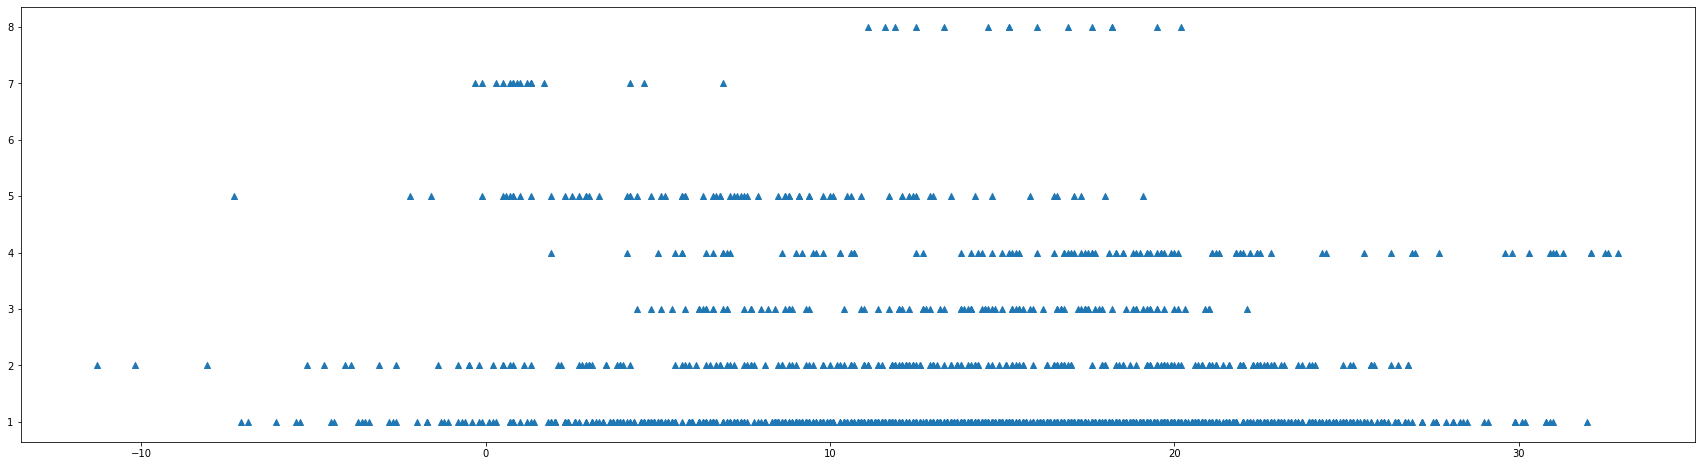

In [3]:
fig = plt.figure(figsize = (30,8))
x = db['temperature']
y = db['weather']
plt.scatter(x,y,marker='^')

C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


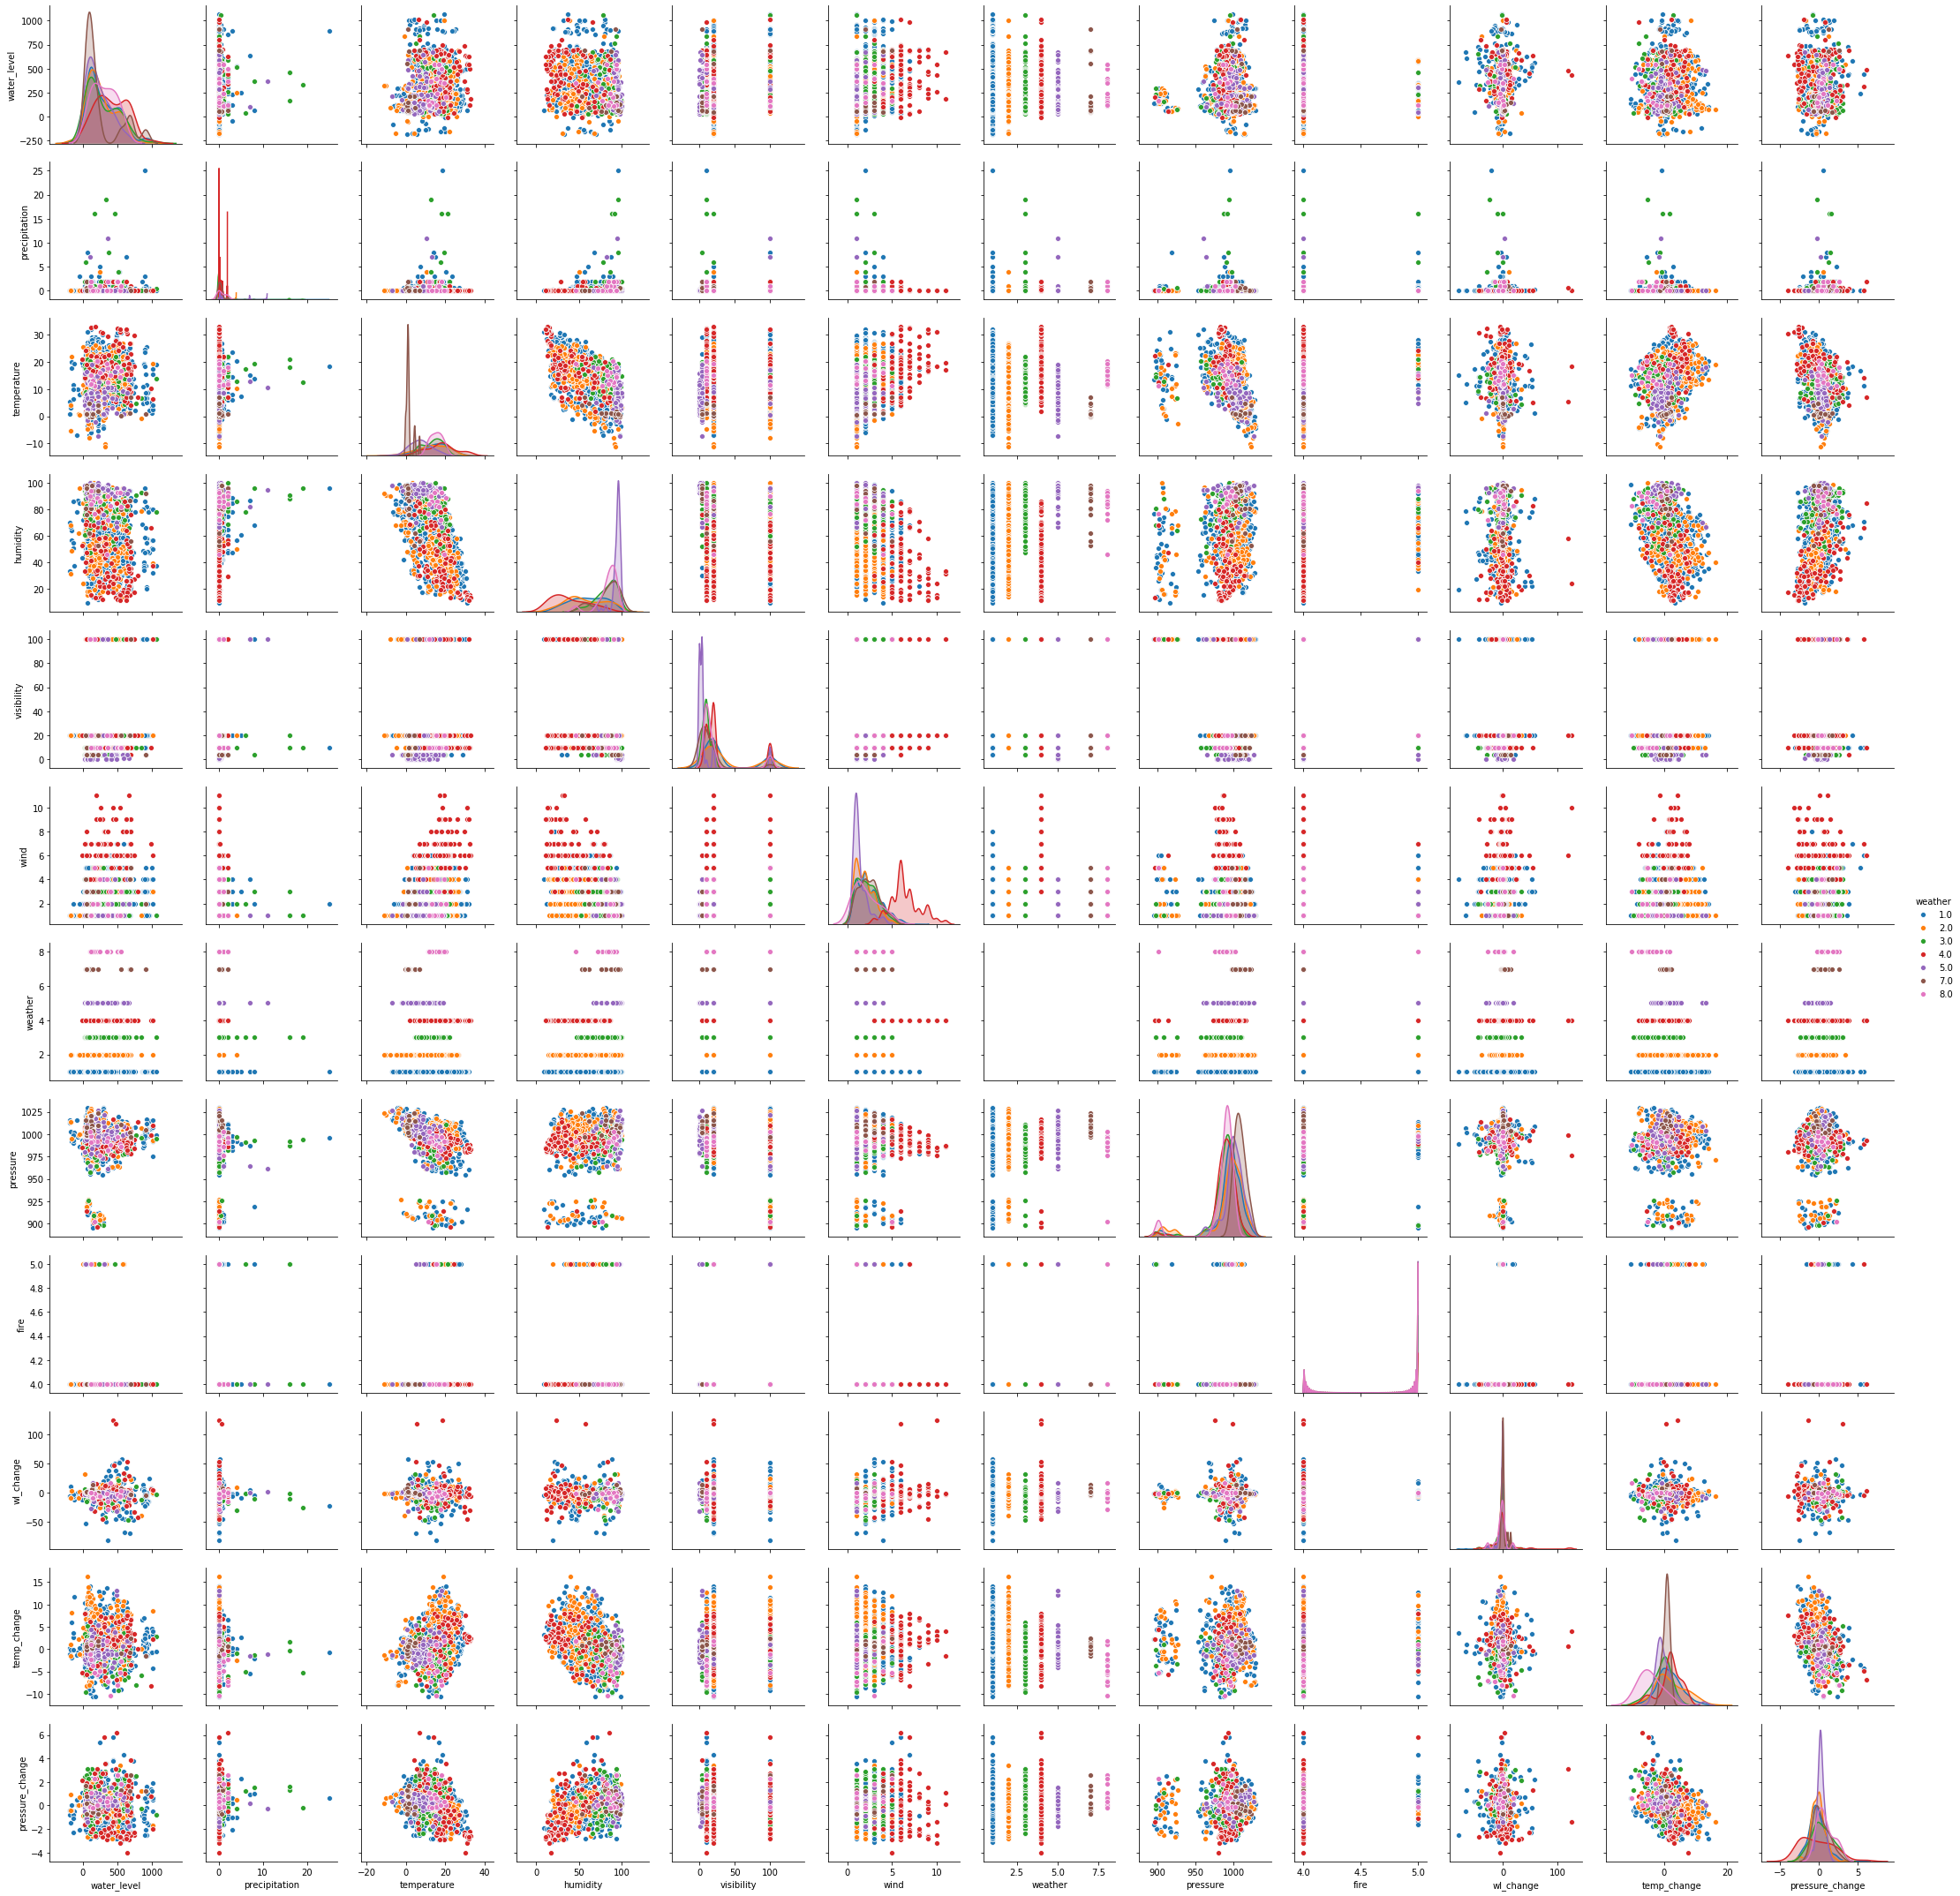

In [4]:
sns.pairplot(db,hue="weather")

In [5]:
X = np.array(db.drop("weather",axis =1))

In [6]:
X = normalize(X, norm='l1')

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters=7, random_state=0, max_iter=2000) 
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=2000,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [9]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 2])

In [10]:
db['K-classes']= kmeans.labels_

In [11]:
db

,water_level,precipitation,temperature,humidity,visibility,wind,weather,pressure,fire,wl_change,temp_change,pressure_change,K-classes
0,468.0,0.0,24.9,31.0,100.0,4.0,1.0,993.8,4.0,-3.0,-0.3,-0.4,1
1,140.0,0.0,27.9,22.0,20.0,1.0,1.0,1004.1,4.0,-2.0,0.6,-1.0,0
2,464.0,0.0,25.6,28.0,20.0,2.0,1.0,1001.2,4.0,-7.0,-1.8,-0.3,1
3,467.0,0.0,26.7,26.0,100.0,3.0,1.0,992.3,4.0,-1.0,1.2,-1.3,1
4,138.0,0.0,29.1,22.0,20.0,1.0,1.0,1001.3,4.0,-2.0,2.5,-1.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,474.0,0.1,6.4,95.0,4.0,1.0,3.0,999.9,4.0,-1.0,5.9,1.5,1
1435,65.0,0.0,6.4,93.0,10.0,4.0,3.0,983.9,4.0,-1.0,5.2,3.1,5
1436,159.0,0.1,8.5,83.0,10.0,2.0,1.0,969.7,4.0,1.0,1.4,1.9,0
1437,99.0,0.1,7.5,91.0,10.0,3.0,3.0,995.4,4.0,-4.0,2.7,1.7,0


C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


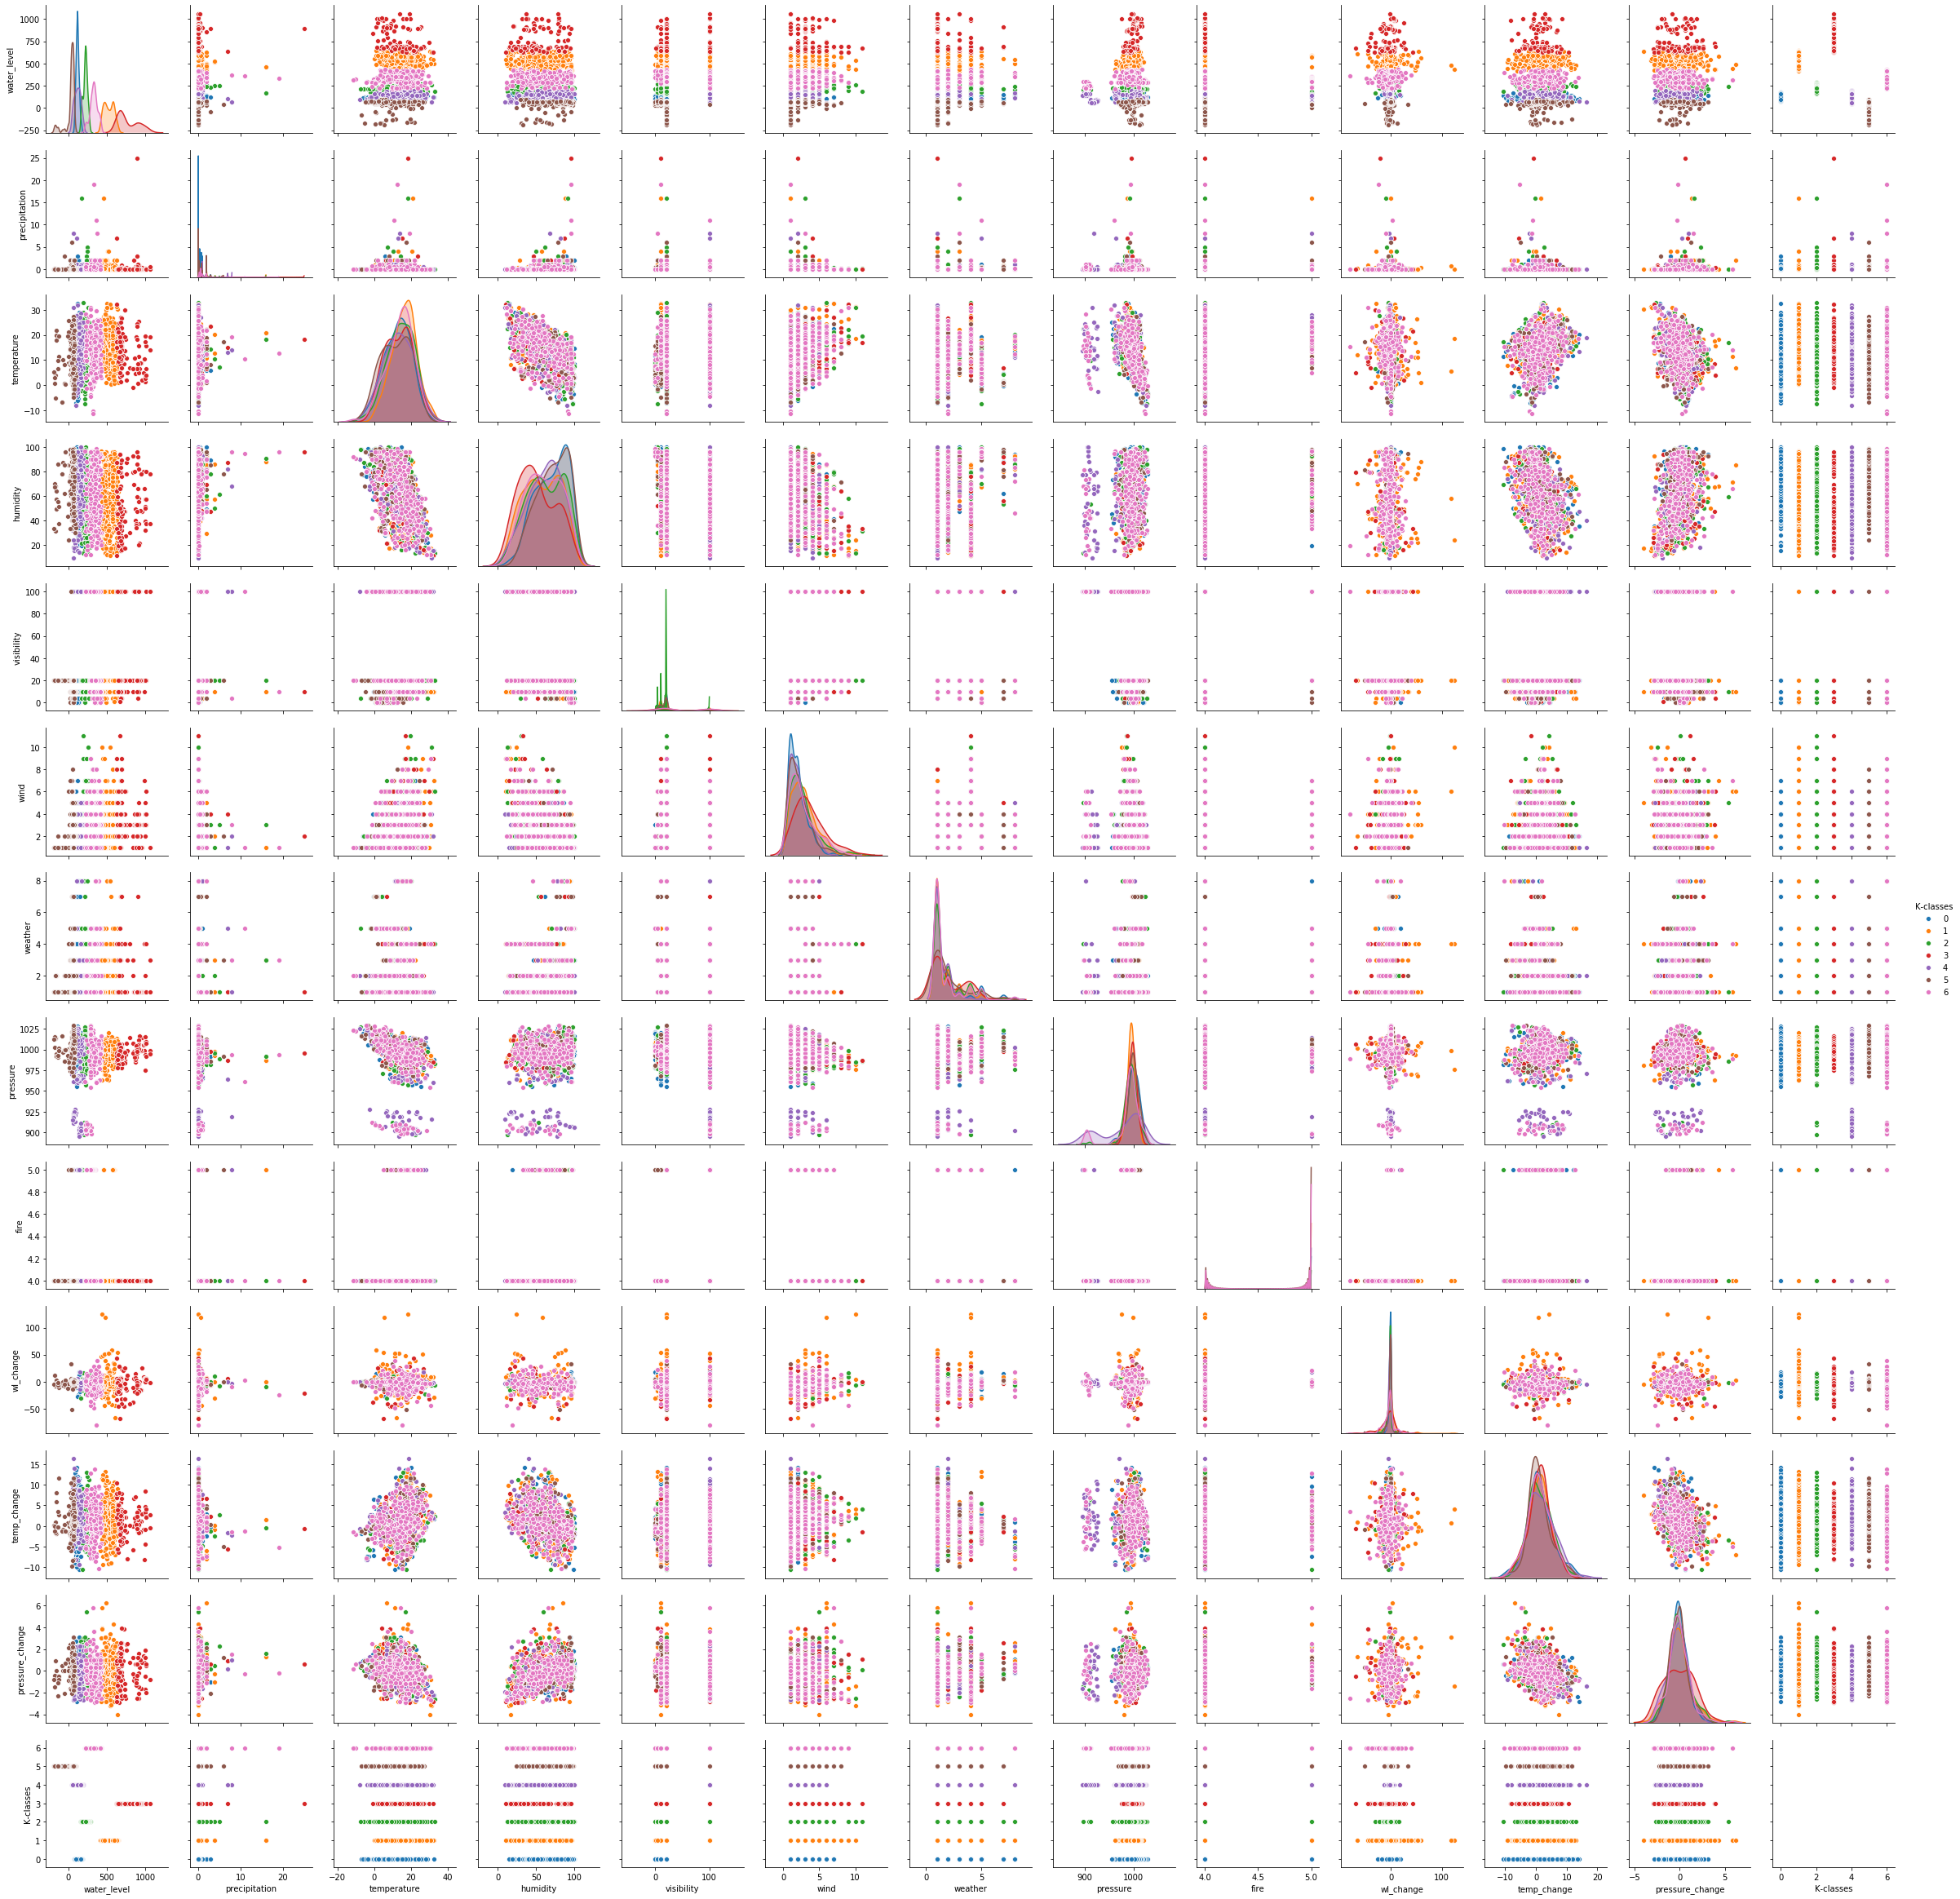

In [12]:
sns.pairplot(db,hue='K-classes')